# S2: Análisis exploratorio de datos

Rodrigo García Manzanas: <rodrigo.manzanas@unican.es>

[R for Data Science](http://r4ds.had.co.nz/index.html)  
![manualRdatascience](figs/manual_R_for_Data_Science.jpg)

## Visualización de datos
### (Dataset de ejemplo: *Iris de Fisher* y *mpg*)

Una de las claves en data science es poder realizar *plots* (gráficos) que ayuden a **entender los datos**. Para ilustrar la importancia de la visualización, en esta sección utilizaremos el dataset de **Iris de Fisher** (también llamado Iris de Anderson) (https://en.wikipedia.org/wiki/Iris_flower_data_set).

<img src="figs/iris_setosa.jpg" width= "250"/> <img src="figs/iris_virginica.jpg" width= "220"/> <img src="figs/iris_versicolor.jpg" width= "240"/> 

Este conjunto de datos contiene 150 muestras de tres especies distintas de Iris (**setosa**, **virginica** e **versicolor**). Cada muestra/observación/instancia contiene cuatro medidas: **largo y ancho del sépalo** y **largo y ancho del pétalo**. En base a la combinación de estas cuatro variables, Fisher desarrolló un modelo discriminante para distinguir entre una especie y otra. 

Este dataset se encuentra en formato **csv** en Kaggle (https://www.kaggle.com/uciml/iris). Lo podemos leer (una vez descargado) en nuestra sesión de R con la función `read.csv` o `read.table`:

In [ ]:
iris.kagg <- read.table(file = ".../Iris.csv", sep = ",")

El dataset *Iris de Fischer* también se encuentra disponible en el paquete `datasets`, que se carga automáticamente en memoria al abrir una instancia de R:

In [1]:
?iris

Podemos consultar cuál es la estructura de `iris` con la función `str()`:

In [2]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


La función de visualización básica de R es `plot`:

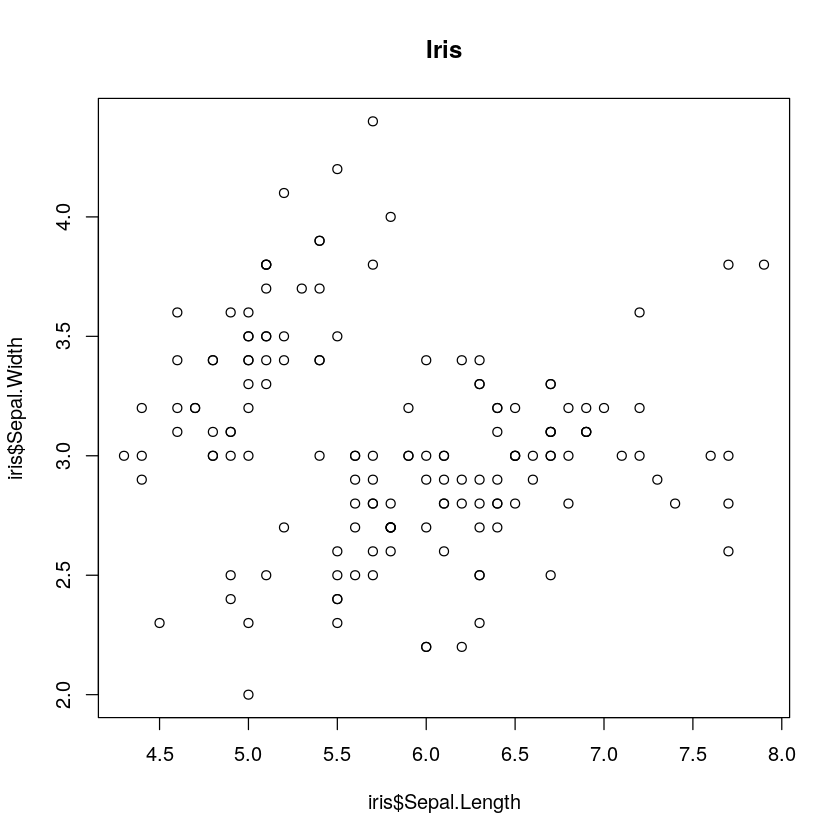

In [3]:
plot(iris$Sepal.Length, iris$Sepal.Width, 
     main = "Iris")

Vamos a crear ahora la misma gráfica pero **diferenciando con colores las diferentes especies de Iris**. Para ello realizaremos una pequeña transformación de los datos tal y como se muestra a continuación:

In [4]:
levels(iris$Species)  # las tres especies

# extraigo los datos que corresponden únicamente a la especie de Iris Setosa
ind <- which(iris$Species == "setosa")
str(iris[ind, ])

# la función `subset` nos permite hacer lo mismo en un solo paso
setosa <- subset(iris, Species == "setosa")
str(setosa)

[1] "setosa"     "versicolor" "virginica"

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Si aplicamos `subset()` para cada una de las especies, mediante las funciones `plot` y `points` podemos diferenciarlas en un mismo gráfico:

In [6]:
versicolor <- subset(iris, Species == "versicolor")
virginica <- subset(iris, Species == "virginica")

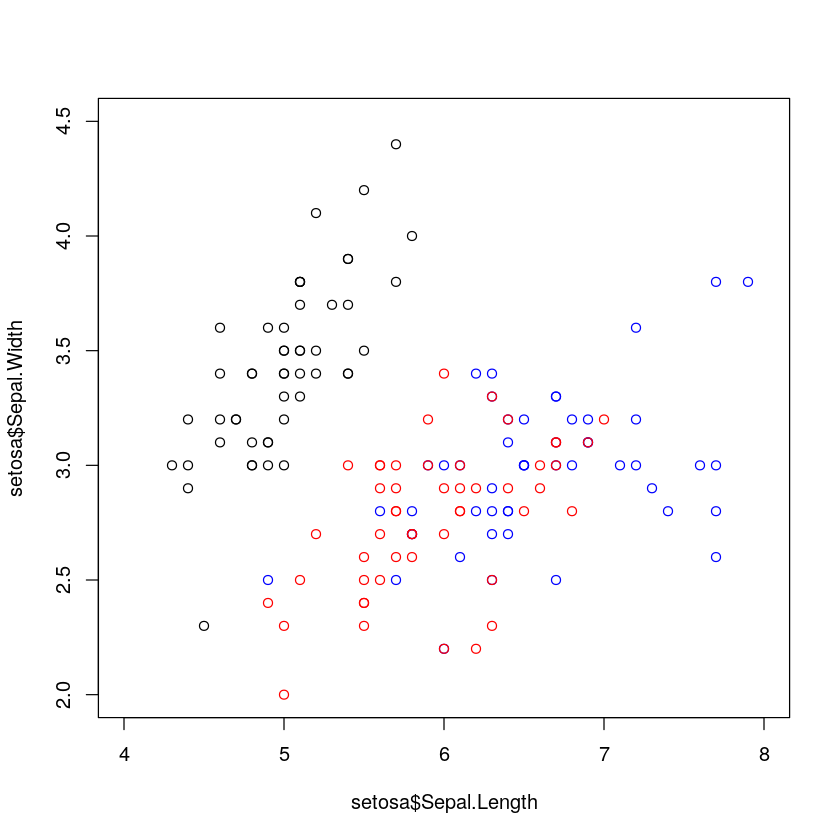

In [7]:
plot(setosa$Sepal.Length, setosa$Sepal.Width, xlim = c(4, 8), ylim = c(2, 4.5))
points(virginica$Sepal.Length, virginica$Sepal.Width, col = "blue")
points(versicolor$Sepal.Length, versicolor$Sepal.Width, col = "red")

Este mismo plot se podría haber hecho directamente pasándole al argumento `col` la variable `Species`:

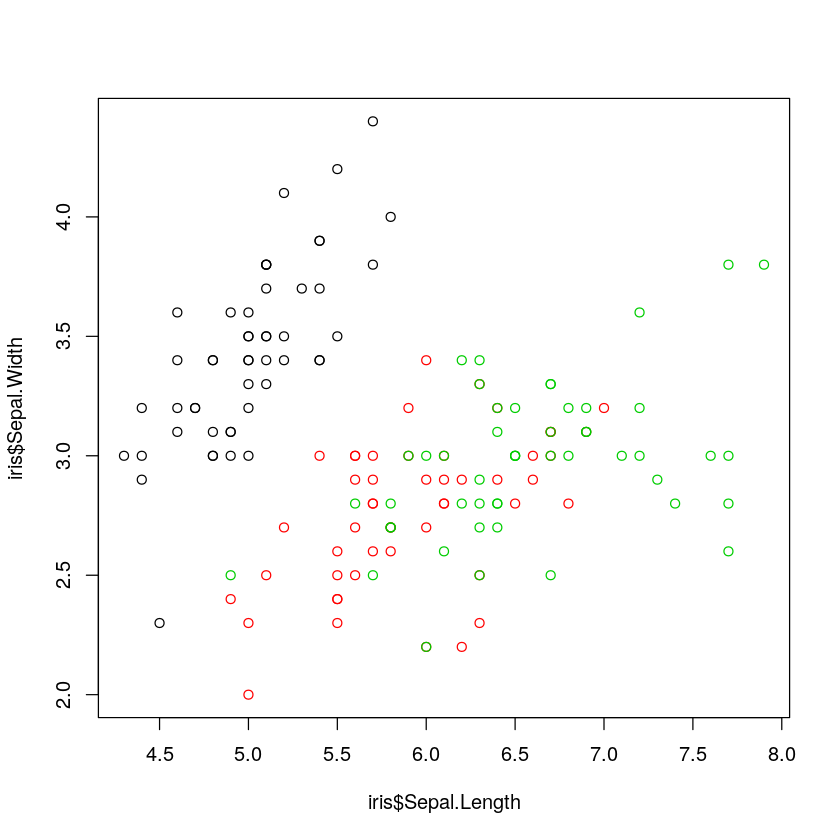

In [8]:
plot(iris$Sepal.Length, iris$Sepal.Width, col = iris$Species)

Algunos argumentos opcionales de `plot`:

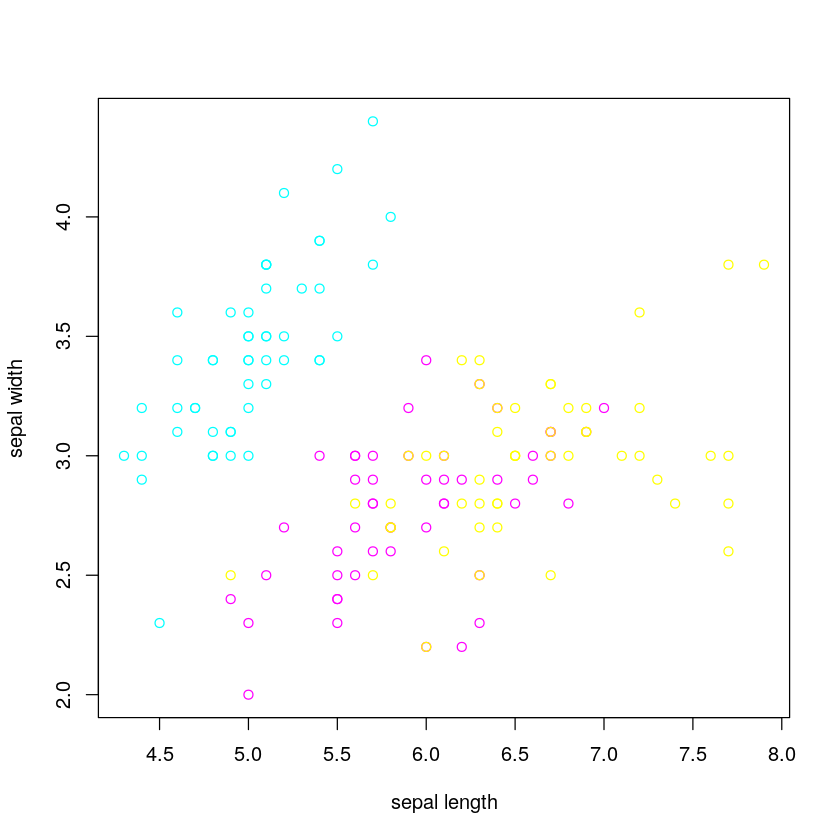

In [10]:
plot(iris$Sepal.Length, iris$Sepal.Width, 
     col = c("cyan", "magenta", "yellow")[iris$Species],
    xlab = "sepal length", ylab = "sepal width")

leend("topright", levels(iris$Species), pch = "o", col = c("cyan", "magenta", "yellow"))
grid()

Existen librerías más potentes para la visualización de datos, por ejemplo, `ggplot` o `lattice`:

In [11]:
#install.packages("lattice")  # instalamos lattice
library(lattice)  # cargamos en memoria lattice

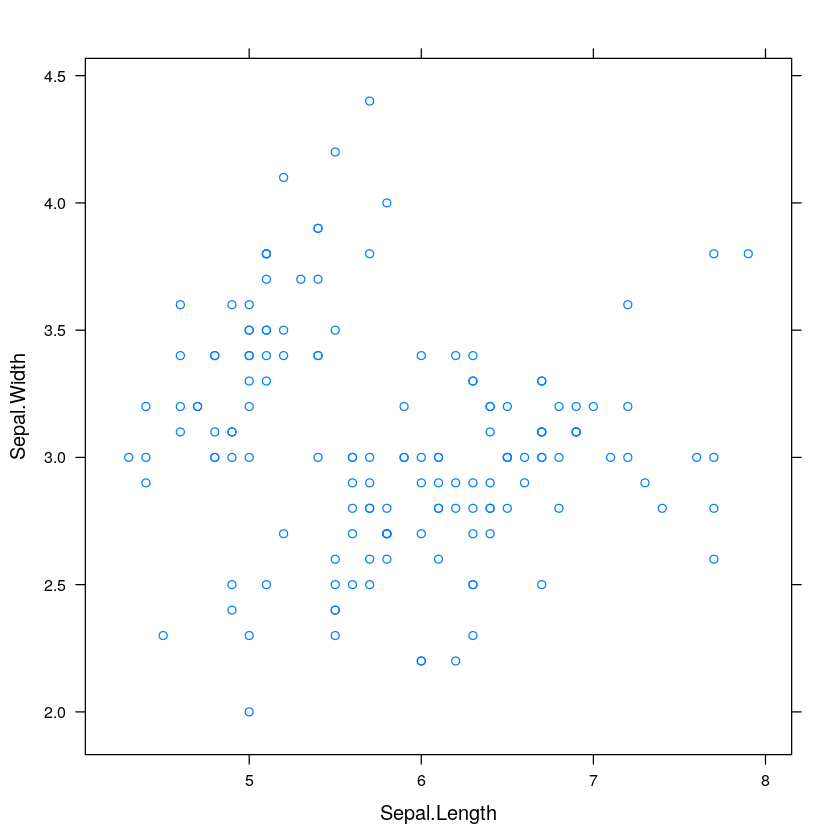

In [12]:
# función xyplot
xyplot(Sepal.Width ~ Sepal.Length, data = iris)

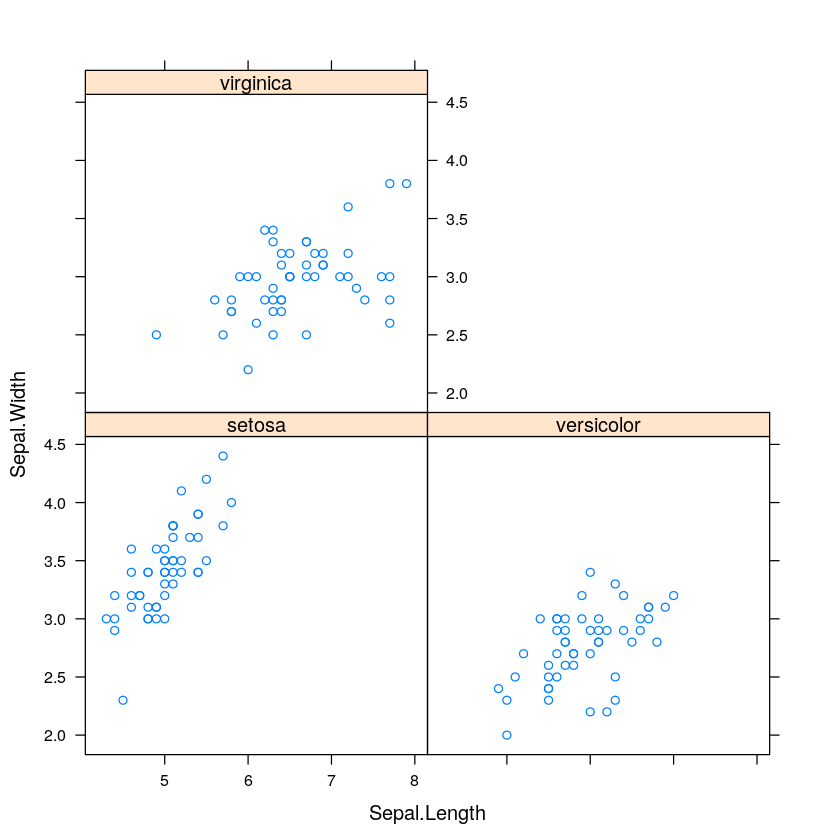

In [13]:
xyplot(Sepal.Width ~ Sepal.Length | Species, data = iris)

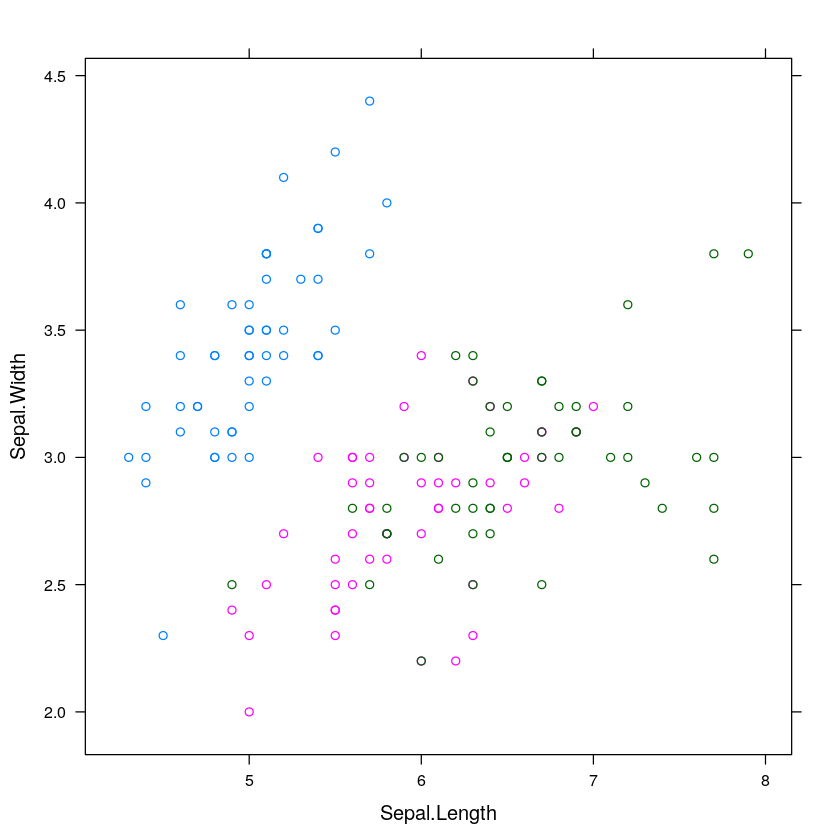

In [14]:
xyplot(Sepal.Width ~ Sepal.Length, group = Species, data = iris)

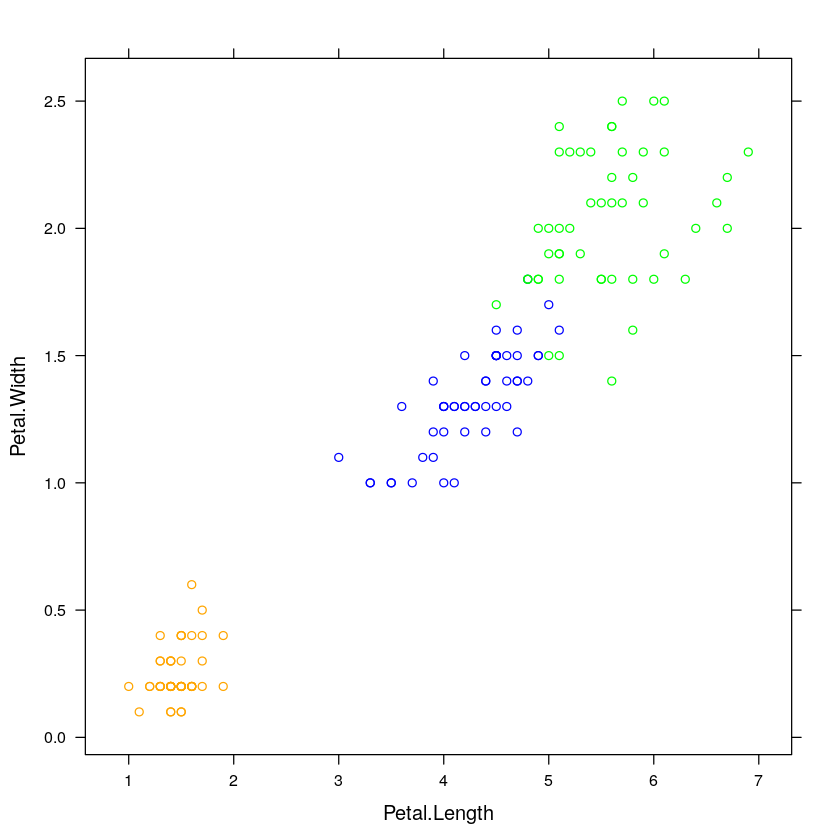

In [15]:
xyplot(Petal.Width ~ Petal.Length, group = Species, data = iris, 
              col = c("orange", "blue", "green"))

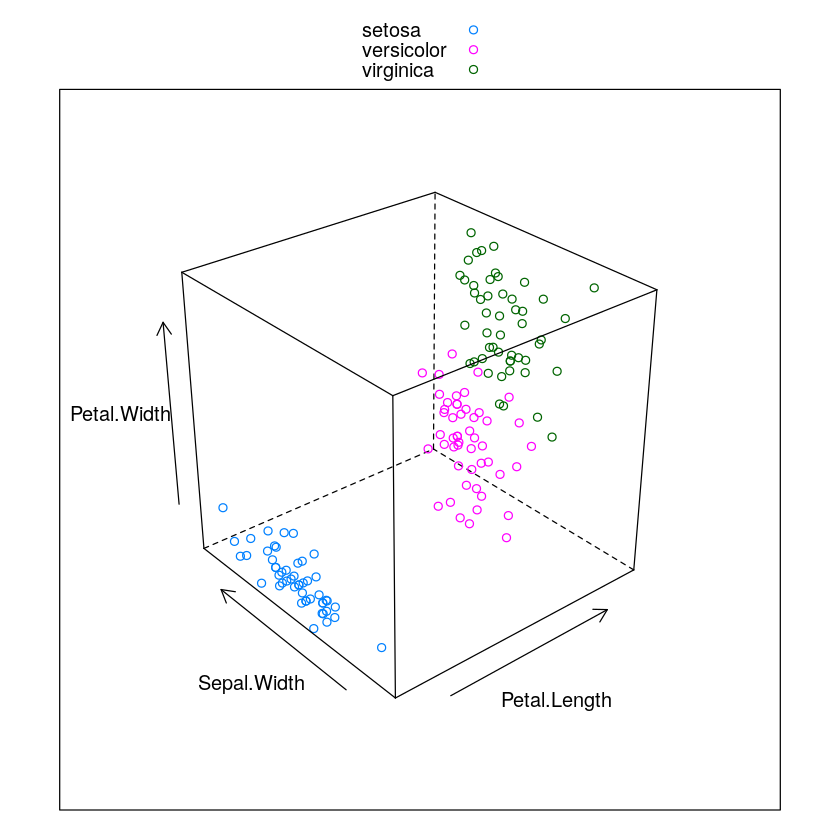

In [16]:
# función cloud: 3-D scatter-plot
cloud(Petal.Width ~ Petal.Length * Sepal.Width, 
      group = Species, data = iris,
    auto.key = TRUE)

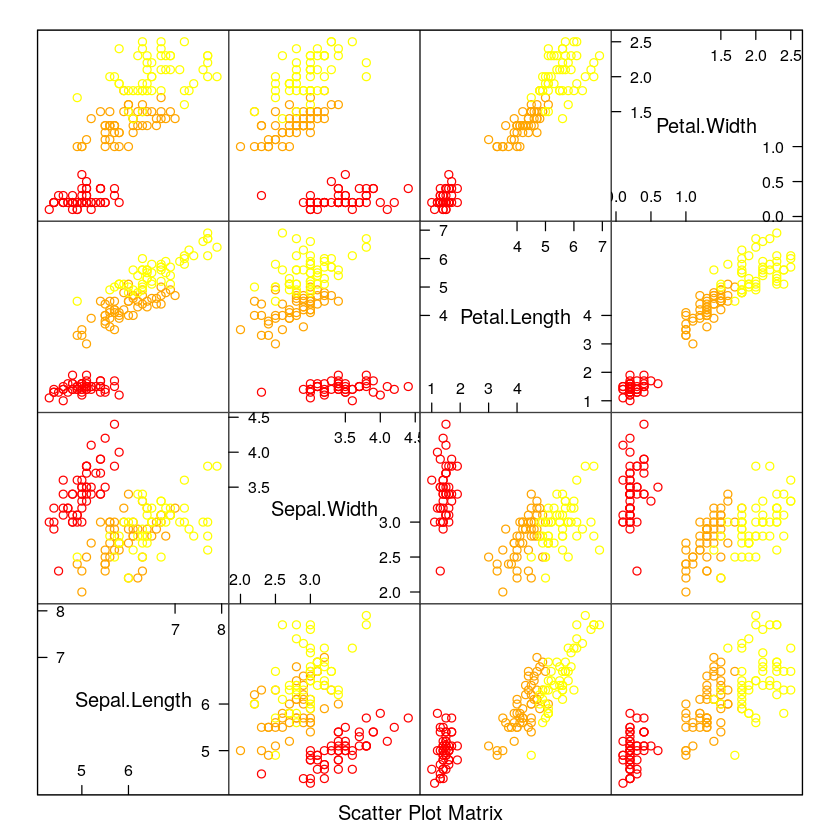

In [17]:
# función splom: matriz de scatter-plots
splom(~iris[1:4], groups = Species, data = iris,
     col = c("red", "orange", "yellow"))

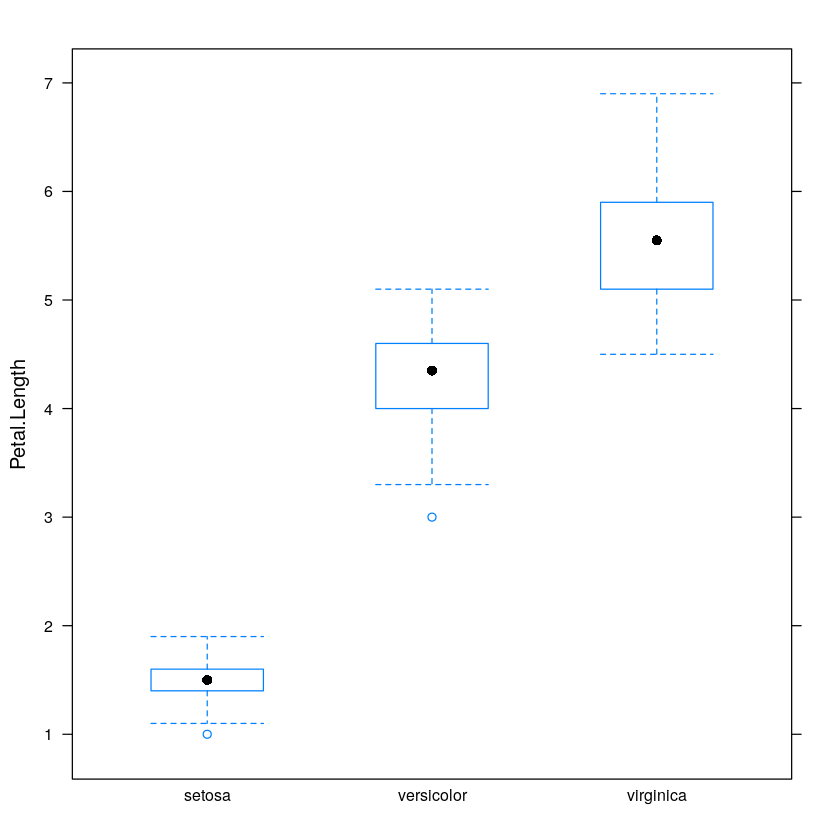

In [18]:
# función bwplot: box-and-whisker plots
bwplot(Petal.Length ~ Species, data = iris)

### El paquete tidyverse
#### Datasets de ejemplo: *Iris de Fisher* y *mpg*

In [ ]:
#install.packages("tidyverse")

In [ ]:
#x <- c("ggplot2","dplyr","tidyr","readr","purrr","tibble","stringr","forcats")
#install.packages(x)

In [19]:
library(tidyverse)
#library("ggplot2")
#library("dplyr")
#library("tidyr")
#library("readr")
#library("purrr")
#library("tibble")
#library("stringr")
#library("forcats")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


La librería tidyverse carga a su vez las siguientes librerías: 
   * **ggplot2**, para visualizar datos.
   * **dplyr**, para manipular datos.
   * **tidyr**, para ordenar datos.
   * **readr**, para importar datos.
   * **purrr**, para programar funciones.
   * **tibble**, para la manipulación de `tibbles`, la versión moderna de los `data.frames`.
   * **stringr**, para manipular cadenas de caracteres (character strings).
   * **forcats**, para manipular factores.
   
En el siguiente ejemplo utilizamos `ggplot()` (paquete `ggplot2`) para visualizar los datos de *iris*.
 
**Se comienza una gráfica con la función `ggplot()`**, que crea un sistema de coordenadas al que **se pueden agregar nuevas capas con el operador `+`**. Por ejemplo, podemos crear un gráfico vacío con `ggplot(data = mpg)` y completarlo con una capa de puntos (un scatter) generada por la función `geom_point`:

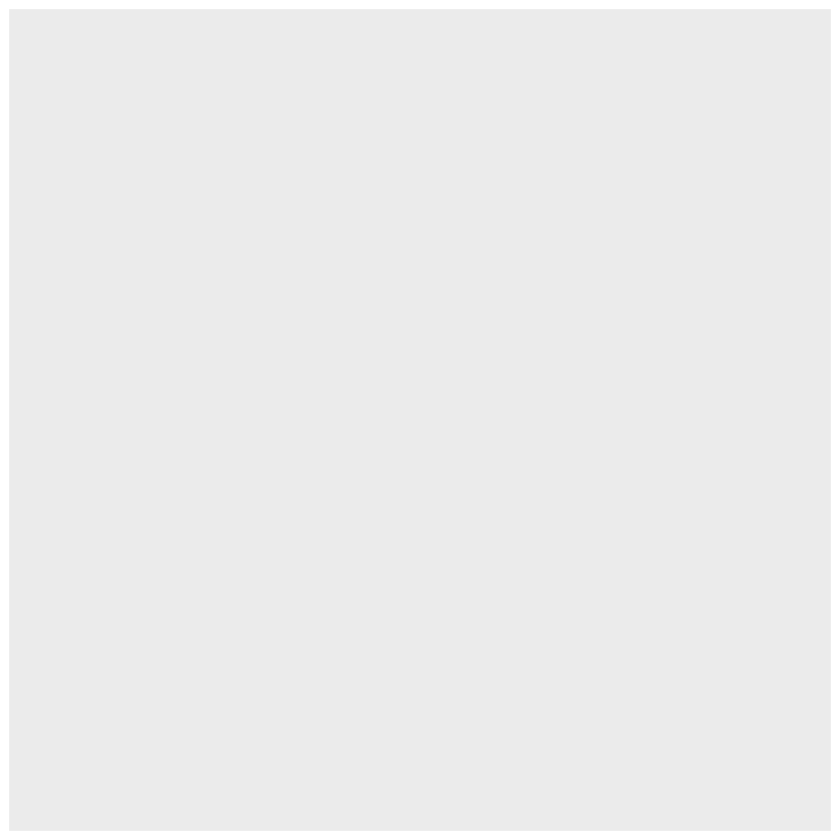

In [20]:
ggplot(iris)

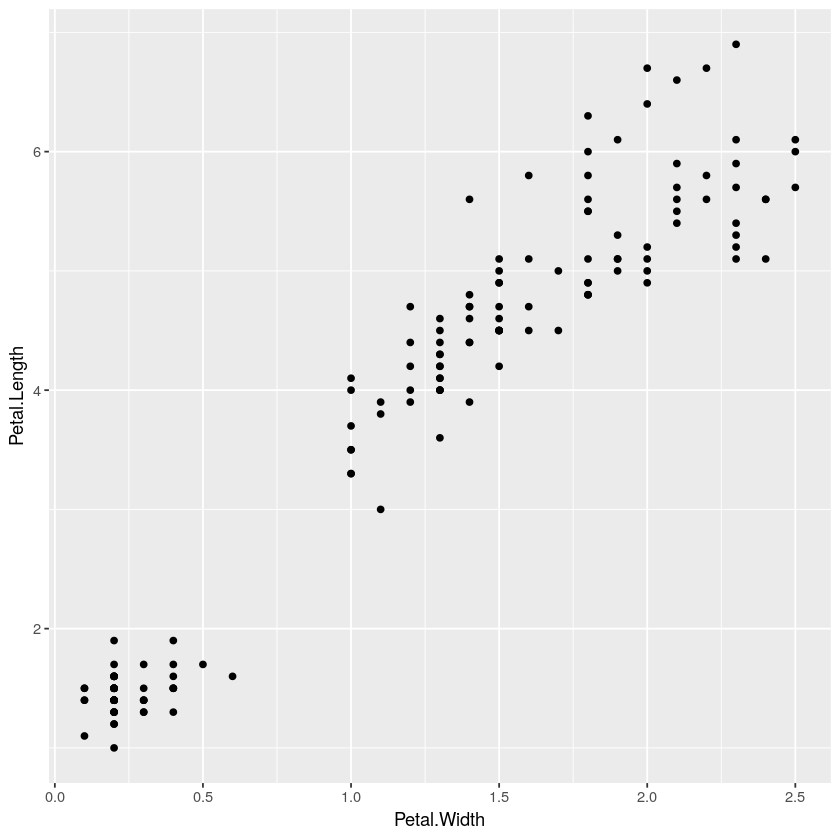

In [21]:
# scatter-plot
ggplot(data = iris) +
geom_point(aes(x = Petal.Width, y = Petal.Length))

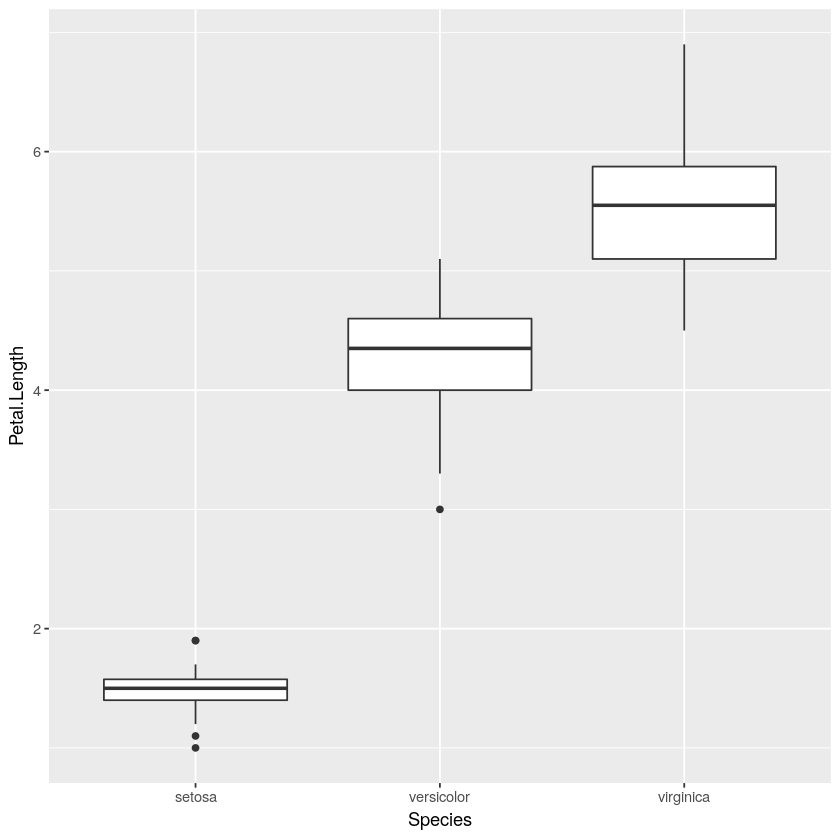

In [22]:
# boxplots
ggplot(data = iris, aes(Species, Petal.Length)) +
geom_boxplot()

Podemos convertir el data frame *iris* a un objeto de tipo *tibble*:

In [ ]:
# convierto data.frame a tibble
class(iris)
iris <- as_tibble(iris)
class(iris)

De aquí en adelante utilizaremos el dataset *mpg* incluido en el paquete *ggplot2*:

In [23]:
data(package = "ggplot2")  # cargo los datasets incluidos en 'ggplot2'

---
### Ejercicio 1

¿Qué clase de objeto es `mpg`? ¿Cuántas columnas y filas tiene? ¿Cuántas variables? ¿De qué tipo? ¿Cuál es la descripción de cada variable? 

In [28]:
# solución
?mpg
str(mpg)
class(mpg)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


[1] "tbl_df"     "tbl"        "data.frame"

Nos fijaremos en dos variables:
* `displ`, tamaño del motor del coche en litros
* `hwy`, millas recorridas en autovía por cada galón de combustible

Utiliza `ggplot` para visualizar `displ` frente a `hwy`. ¿Qué podemos decir de estas dos variables?

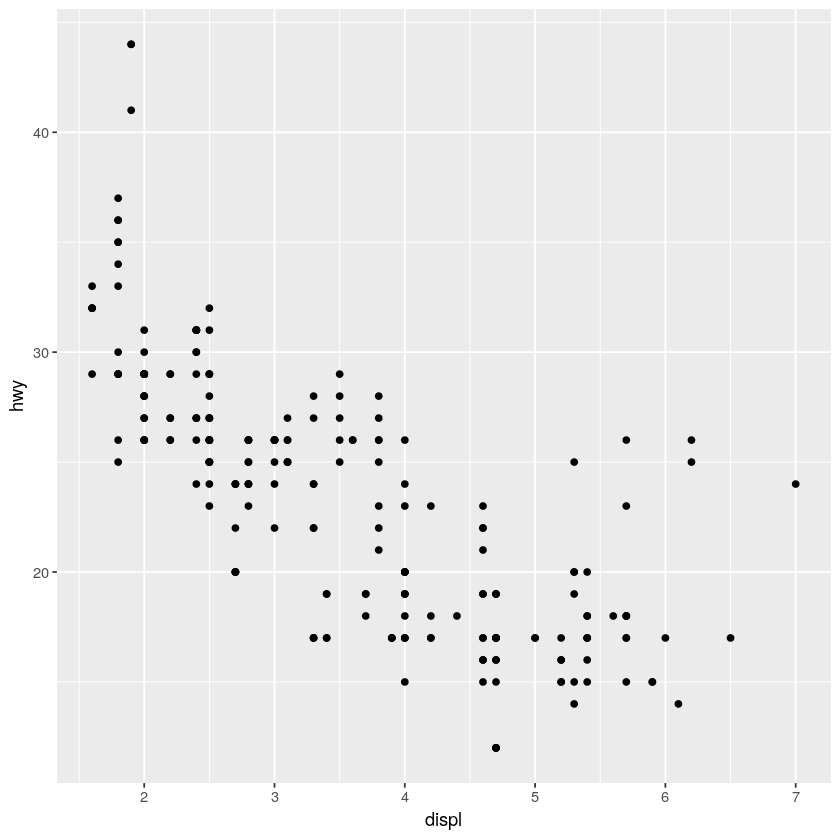

In [27]:
# ggplot(...) + geom_point(...)
ggplot(mpg) + geom_point(aes(x = displ, y = hwy))

Si volvemos a pintar el mismo gráfico pero asociando un color distinto a cada tipo de automóvil (variable `class`) se pueden sacar conclusiones interesantes

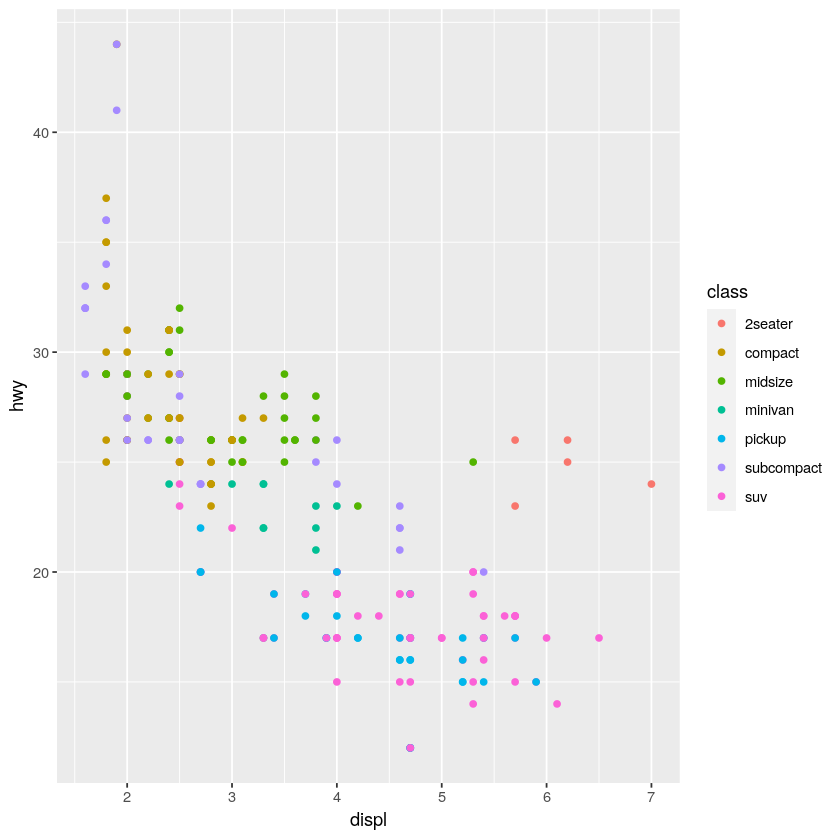

In [29]:
ggplot(mpg) + geom_point(aes(x = displ, y = hwy, color = class))

---
### Ejercicio 2

1) Crea un gráfico de puntos (`displ` vs `hwy`) con `ggplot` donde los puntos se diferencien por tamaño de punto (`size`) para una variable continua (e.g.`cty`).

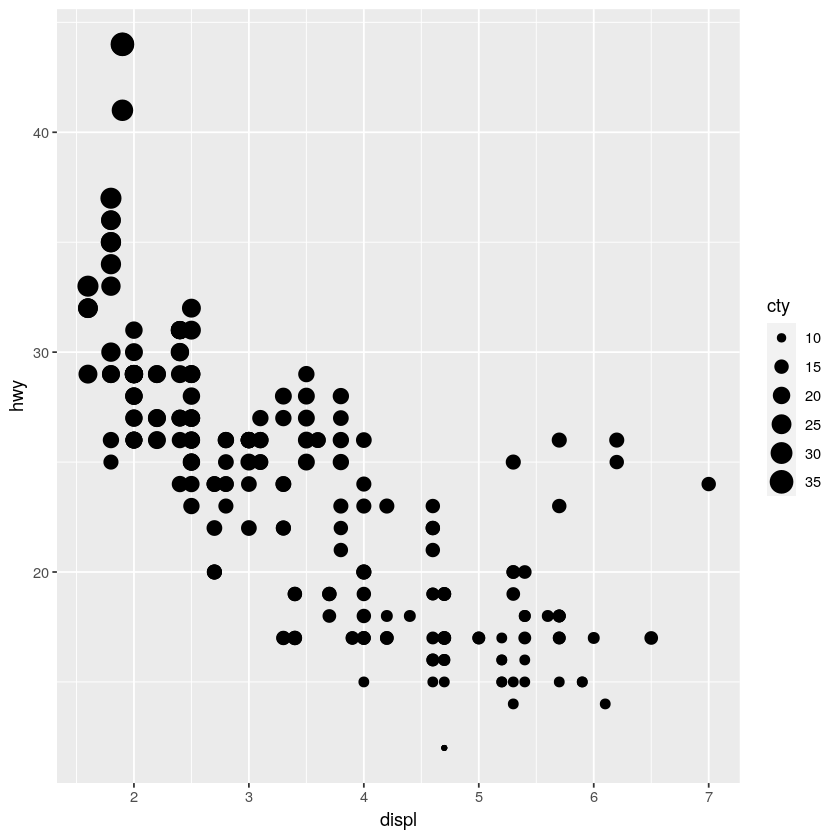

In [31]:
# ggplot(...)
ggplot(mpg) + geom_point(aes(x = displ, y = hwy, size = cty))

2) Trata de diferenciar los puntos del gráfico por forma (`shape`) en base a una variable continua (e.g. `cty`)

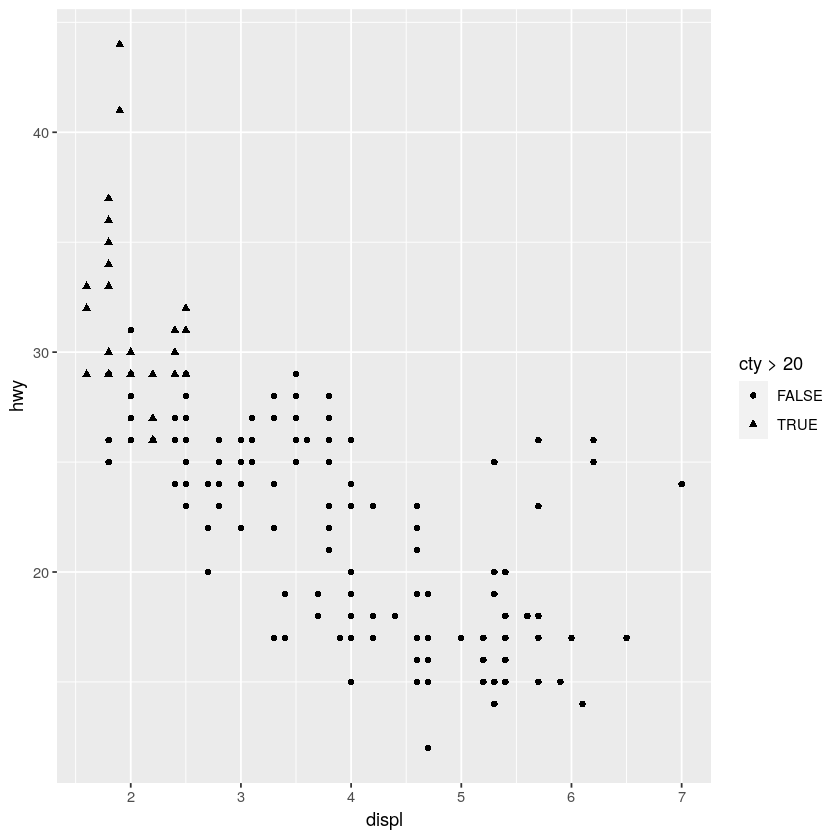

In [32]:
# ggplot(...)
ggplot(mpg) + geom_point(aes(x = displ, y = hwy, shape = cty > 20))

Otra estrategia útil para diferenciar grupos de puntos es utilizar `facet_wrap()` como una capa más de `ggplot`.

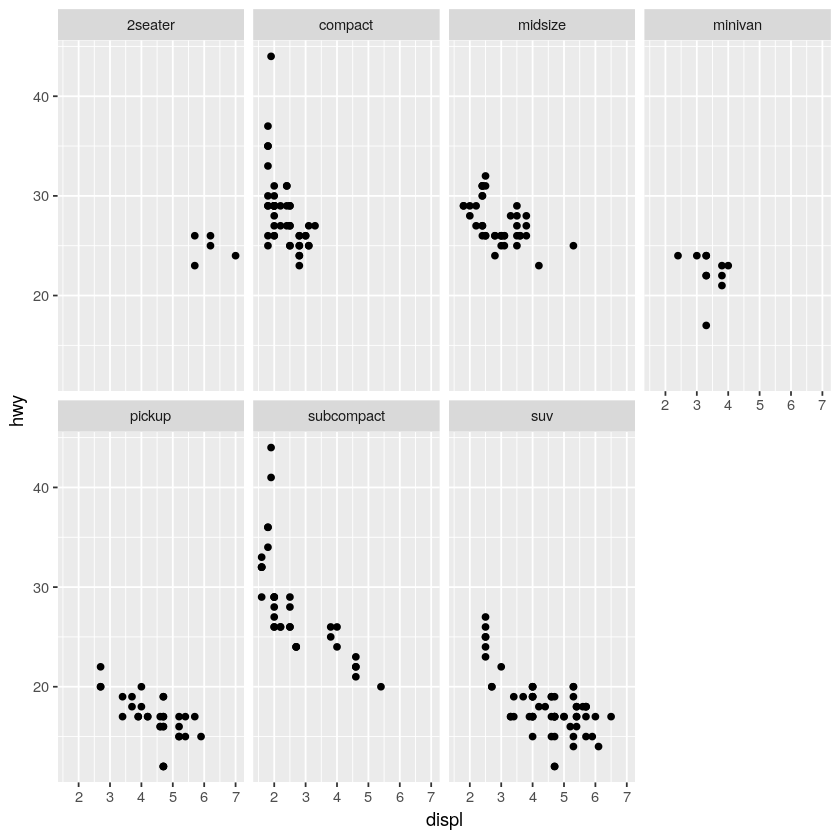

In [33]:
ggplot(data = mpg) + 
  geom_point(aes(x = displ, y = hwy)) + 
  facet_wrap(~class, nrow = 2)

## Transformación de datos
### (Dataset de ejemplo: *flights*)

La visualización es una herramienta importante para la generación de información, pero es raro obtener los datos en la forma en que se requiere para poder graficarla directamente. A menudo, será necesario crear nuevas variables, generar información sintetizada, reordenar observaciones, cambiar el tipo y/o nombre de algunas variables... para que sea más fácil trabajar con los datos.

Continuando con el uso de los paquetes de `tidyverse`, utilizaremos el paquete **`dplyr`** para transformar el dataset `flights` (flights departing New York City in 2013), contenido en el paquete `nyflights13`.

In [35]:
#install.packages("nycflights13")
library(nycflights13)
str(flights)

tibble [336,776 × 19] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:336776] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:336776] 515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num [1:336776] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int [1:336776] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:336776] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num [1:336776] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr [1:336776] "UA" "UA" "AA" "B6" ...
 $ flight        : int [1:336776] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr [1:336776] "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr [1:336776] "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : ch

Las cinco **funciones clave de `dplyr`** que permiten resolver la gran mayoría de los problemas de manipulación de datos son las siguientes:

  * **filter()**, extrae subconjuntos de datos en función de sus valores.
  * **arrange()**, reordena filas.
  * **select()**, extraer variables por su nombre.
  * **mutate()**, crear nuevas variables con funciones de las variables existentes.
  * **summarise()**, collapse many values down to a single summary.

### Filtrar filas

Mediante el uso de los operadores comparativos: **>, >=, <, <=, !=, ==**

In [38]:
jan1 <- filter(flights, month == 1, day == 1)
dim(jan1)[1]*365

[1] 307330

In [ ]:
day1 <- filter(flights, month != 2, day == 1)
ggplot(day1, aes(x = month, y = dep_delay, group = month)) +
geom_boxplot(width = 0.3, na.rm = TRUE)

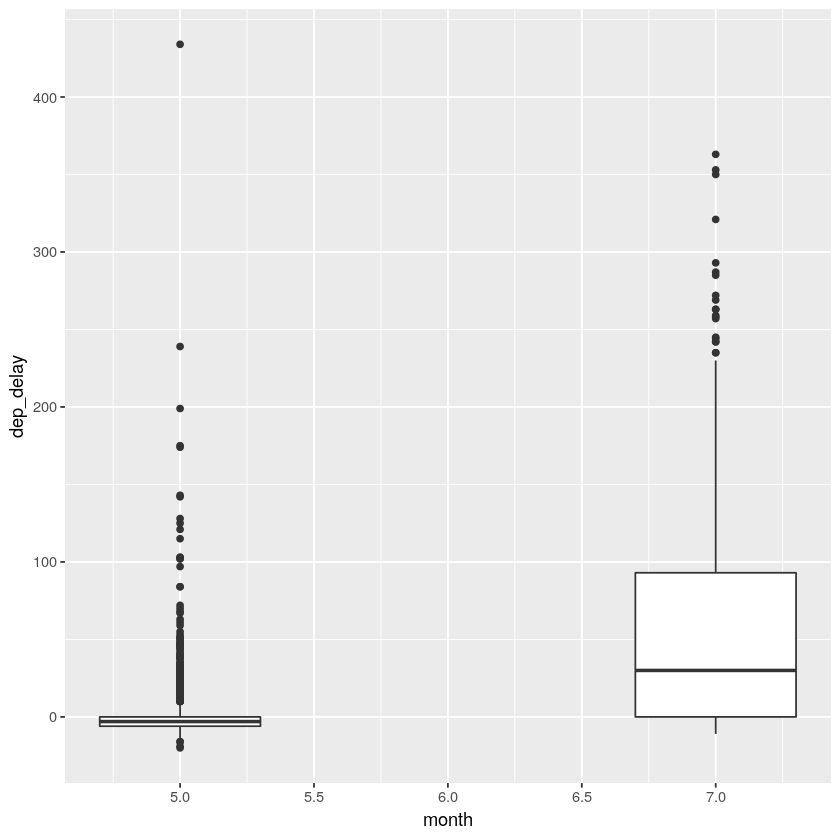

In [39]:
month2 <- filter(flights, month == 5 | month == 7, day == 1)
ggplot(month2, aes(x = month, y = dep_delay, group = month)) +
geom_boxplot(width = 0.6, na.rm = TRUE)

### Ordenar filas

In [ ]:
bydate <- arrange(flights, year, month, day)
bydelay <- arrange(flights, desc(dep_delay))
ggplot(flights) +
geom_point(aes(1:nrow(flights), dep_delay)) +
geom_point(aes(1:nrow(flights), bydelay$dep_delay), color = "red")

---
### Ejercicio 3

¿Qué día tuvo lugar el vuelo más largo? ¿Y el más corto?

In [50]:
# arrange(...
bytime <- arrange(flights, desc(air_time))
bt = bytime[!is.na(bytime), ]

---

### Seleccionar columnas

In [51]:
names(flights)

[1] "year"           "month"          "day"            "dep_time"      
 [5] "sched_dep_time" "dep_delay"      "arr_time"       "sched_arr_time"
 [9] "arr_delay"      "carrier"        "flight"         "tailnum"       
[13] "origin"         "dest"           "air_time"       "distance"      
[17] "hour"           "minute"         "time_hour"

In [ ]:
# seleccionar por el nombre de la columna
print(select(flights, year, month, day))

# seleccionar todas las columnas entre "year" y "day"
print(select(flights, year:day))

# seleccionar todas las columnas excepto las que están entre "year" y "day"
print(select(flights, -(year:day)))

Hay una serie de funciones "helper" que pueden utilizarse dentro de la función `select()`. Algunas de ellas son las siguientes:

   * `last_col()`
   * `starts_with("abc")`
   * `ends_with("xyz")`
   * `contains("ijk")`

In [ ]:
flight_times <- select(flights, ends_with("time"))
str(flight_times)

### Añadir nuevas variables

Además de seleccionar conjuntos de columnas existentes, a menudo es útil agregar nuevas columnas que son funciones de columnas existentes. Para esto se utiliza la función `mutate()`.

`mutate()` siempre agrega nuevas columnas al final de un conjunto de datos, por lo que utilizaremos un subconjunto de `fights` (usando `select()`) para que podamos ver las nuevas variables. 

In [ ]:
# selección de variables dentro de flights
flights.sml <- select(flights, 
  year:day, 
  ends_with("delay"), 
  distance, 
  air_time
)
names(flights.sml)

# agrego dos nuevas variables a flights_sml
mutate(flights.sml,
  gain = dep_delay - arr_delay,
  speed = distance / air_time * 60
)

## Importar (leer) y exportar (escribir) datos

### (Dataset de ejemplo: *Iris de Fisher* y *flights*)

Trabajar con los datos proporcionados por los paquetes de R es una excelente manera de familiarizarse con las herramientas más comunes en data science, pero en algún momento necesitaréis comenzar a trabajar con vuestros propios datos.

Utilizaremos el paquete **`readr`**, que es también parte de `tidyverse`.

### Leer datos
La mayoría de las funciones de lectura convierten archivos planos en data frames:

* `read_csv()` lee archivos delimitados por comas, `read_csv2()` lee archivos separados por punto y coma, `read_tsv()` lee archivos delimitados por tabulaciones, y `read_delim()` lee archivos con cualquier delimitador.

* `read_fwf()` lee archivos de ancho fijo. Puede especificar campos por su ancho con `fwf_widths()` o su posición con `fwf_positions()`. `read_table()` lee una variación común de archivos de ancho fijo donde las columnas están separadas por espacios en blanco.

* `read_log()` reads Apache style log files (ver https://www.screamingfrog.co.uk/an-seos-guide-to-apache-log-files/)

In [ ]:
iris <- read_csv(".../Iris.csv")
str(iris)

También podemos pasar a `read_csv` un csv que generemos "al vuelo" en R: 

In [ ]:
read_csv("a,b,c
1,2,3
4,5,6")

A veces hay algunas líneas de metadatos en la parte superior del archivo:
* El argumento `skip = n` se usa para omitir las primeras n líneas. 
* El argumento `comment = "#"` se usa para eliminar todas las líneas que comienzan con (por ejemplo #)

In [ ]:
read_csv("The first line of metadata
  The second line of metadata
  x,y,z
  1,2,3", skip = 2)

In [52]:
read_csv("# A comment I want to skip
  x,y,z
  1,2,3", comment = "#")

x,y,z
<dbl>,<dbl>,<dbl>
1,2,3


El símbolo `\n` se usa para agregar una nueva línea. Por otra parte, `col_names` permite dar nombres a las columnas. 

In [53]:
# nombrar las columnas automáticamente
read_csv("1,2,3\n4,5,6", col_names = FALSE)  

X1,X2,X3
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


Puedes pasar a `col_names` un vector de caracteres que se usará como nombres de columna:

In [54]:
# nombrar las columnas a deseo del usuario
read_csv("1,2,3\n4,5,6", col_names = c("col1", "col2", "col3"))

col1,col2,col3
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


El argumento `na` se usa para especificar qué valor (o valores) del archivo son "missing values":

In [55]:
read_csv("a,b,c\n1,2,.", na = ".")

a,b,c
<dbl>,<dbl>,<lgl>
1,2,NA


Las principales ventajas de `read_csv` frente a `read.csv` (de base de R) son:
* Es más rápido.
* Importa los datos a un objeto de clase `tibble`. De manera que...
    - No convierte los "character" a "factor" for defecto
    - No usa nombres de filas
    - No transforma los nombres de columna

---
### Ejercicio 4

Identifica qué está mal en los siguientes csv y corrígelo:

In [ ]:
read_csv("a,b\n1,2,3\n4,5,6")
read_csv("a;b\n1;3")

¿Qué función de importación utilizarías para un archivo separado por "|" (e.g. "a|b|c\n1|2|3")? Escribe un ejemplo a continuación:

In [56]:
# solución
read_delim("a|b|c\n1|2|3", "|")

a,b,c
<dbl>,<dbl>,<dbl>
1,2,3


### Escribir datos

`readr` incluye tres funciones útiles para escribir datos en disco: `write_csv()`, `write_delim()` `write_tsv()`

---

### Ejercicio 5

Exporta el dataset `flights` como un fichero csv a tu ordenador, salvando los missing values como -999 (utiliza `?write_csv` como ayuda).

In [ ]:
# write_...
write_csv(flights, file = ".../file_output.csv")

---

## Ordenar datos

### (Datasets de ejemplo: *table1*, *table2*, *table3*, ... y *flights*)

A veces nos tenemos que enfrentar a datasets desordenados y complejos. El paquete **`tidyr` ofrece herramientas que ayudan a ordenar datos.** 
Los datos que utilizaremos en esta sección se incluyen en el paquete `tidyr`: `table1`, `table2`, `table4a` y `table4b`

In [57]:
table1

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [58]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [59]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [60]:
table4a

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


In [61]:
table4b

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583


Todas estas tablas son representaciones del mismo conjunto de datos subyacente, pero no son igualmente fáciles de usar. Nuestro objetivo es obtener un conjunto de datos ordenado.


Hay tres reglas que cumple un **conjunto de datos ordenado**:

* **Cada variable** debe tener su **propia columna**.
* **Cada observación** debe tener su **propia fila**.
* **Cada valor** debe tener su **propia celda**.

![](figs/tidy-1.png)

En este ejemplo, únicamente `table1` está ordenada: es la única representación donde cada columna es una variable.

In [ ]:
# añadimos la variable rate a table1
mutate(table1, rate = cases / population * 10000)

Un problema común que nos encontramos en muchos datasets es que algunos **nombres de columnas** no son nombres de variables, sino **valores de una variable**, como ocurre por ejemplo en `table4a` y `table4b`. En estos casos podemos recurrir a la función `gather()`

In [62]:
table4a

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


In [64]:
table4a
tidy4a <- gather(table4a, "1999", "2000", key = "year", value = "cases")
tidy4a

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766


In [ ]:
table4b
tidy4b <- gather(table4b, "1999", "2000", key = "year", value = "population")
tidy4b

Podemos utilizar la función `left_join()` de `dplyr` para combinar `table4a` y `table4b`:

In [ ]:
left_join(tidy4a, tidy4b)

A veces una **observación** está dispersa **en varias filas** (e.g. `table2`, una observación es un país en un año, pero cada observación se distribuye en dos filas). En estos casos podemos recurrir a la función `spread()`. 

In [65]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [66]:
table2
tidy2 <- spread(table2, key = type, value = count)
tidy2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


A veces podemos encontrarnos con **una columna** que contiene **dos variables** (e.g. `table3`, la columna `rate` contiene las variables `cases` y `population`). En esos casos podemos recurrir a la función `separate()`. 

In [67]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [68]:
table3
tidy3 <- separate(table3, rate, into = c("cases", "population"), sep = "/")
tidy3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [ ]:
tidy3 <- separate(table3, rate, into = c("cases", "population"), sep = "/")
unite()

La función `unite()` sería la inversa a `separate()`, ya que nos permite **combinar** múltiples **variables en una única**

In [69]:
unite(tidy3, cases_population, cases, population, sep = "_")

country,year,cases_population
<chr>,<int>,<chr>
Afghanistan,1999,745_19987071
Afghanistan,2000,2666_20595360
Brazil,1999,37737_172006362
Brazil,2000,80488_174504898
China,1999,212258_1272915272
China,2000,213766_1280428583


--- 
### Ejercicio 6

Utiliza el dataset `flights` y la función `unite()` para crear la variable `fecha` que combina el año, el mes y el día.

In [ ]:
# unite()..

---

**Uso de pipes**

Hasta ahora hemos ido ejecutando cada proceso con líneas de código independientes, asignando cada resultado provisional a una nueva variable. Sin embargo, es bastante común ir enlazando código mediante el símbolo `%>%`. Por ejemplo:

In [ ]:
data("iris")
iris %>%
group_by(Species) %>%
  summarise(meanSL = mean(Sepal.Length), meanSW = mean(Sepal.Width), 
          meanPL = mean(Petal.Length), meanPW = mean(Petal.Width))

En el siguiente ejemplo se importa el dataset contenido en el archivo *titanic.csv* y se realizan una serie de operaciones encadenadas con él:

In [ ]:
titanic <- read_csv(".../titanic.csv")
str(titanic)

In [ ]:
titanic %>%

  select(-PassengerId, -Name, -Cabin, -Ticket) %>%  # elimino variables

  mutate(Sex = fct_recode(Sex, # modifico los niveles de dos variables tipo factor a mano
           "0" = "male",
           "1" = "female"),
         Embarked = fct_recode(Embarked,
           "1" = "S",
           "2" = "C",
           "3" = "Q")) %>%

  mutate(Sex = as.integer(Sex), # convierto de string a entero para que todas las variables del dataset sean numéricas
         Embarked = as.integer(Embarked)) %>%

  filter(complete.cases(.)) %>%  # elimino missing values

  cor() %>%  # calculo la correlación de cada variable con todas las demás

  abs() %>%  # calculo el valor absoluto de las correlaciones

  levelplot(col.regions = c(gray.colors(10), rev(gray.colors(10))) , at = seq(-1, 1, 0.1))  # dibujo un p-color con las correlaciones (en valor absoluto) halladas

---

## Caso de estudio

(Dataset de ejemplo: *Kaggle ML and Data Science Survey, 2017*)

[Kaggle](https://www.kaggle.com/)   es una plataforma web que reune a la mayor comunidad de data scientists del mundo. Kaggle ofrece:
 
 * **Competiciones** publicadas por empresas en las que los participantes compiten para construir el mejor algoritmo que de solución al problema planteado
 * Más de 400000 **notebooks** (sobre todo en Python y R)
 * Más de 50000 **datasets públicos**
 * **Cursos** para aprender o mejorar en data science (e.g. Python, machine learning, visualización de datos...)

![](figs/kaggle_learn.png)

 1) Consulta el "overview" del dataset "Kaggle ML and Data Science Survey, 2017" de Kaggle (https://www.kaggle.com/kaggle/kaggle-survey-2017)
 
 2) Descárgalo y léelo en R. ¿Un único csv o varios?
 
 3) Echa un vistazo a los scripts de R Markdown (notebooks con extensión ".Rmd") disponibles.
 
 4) Puedes elegir el que más te interese. Este, https://www.kaggle.com/kumarhalake/kaggle-survey-2017-graphical-exploration, es apropiado para visualizar datos. Puedes encontrar otro donde muestren cómo transformar los datos, por ejemplo, https://www.kaggle.com/mrisdal/dealing-with-dirty-data-on-the-job, o cómo ordenarlos (tidy).
 
 5) Reproduce alguno de los gráficos y pasos que se muestran en los notebooks de kaggle.